In [3]:

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.optim.lr_scheduler import StepLR
from torchsummary import summary


In [4]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image
from IPython.display import display
from tqdm import tqdm

In [8]:
# changing the directory 
os.chdir('../artifacts/09_10_2024_11_38_32/data_ingestion/data')

In [14]:
os.getcwd()

'c:\\Users\\HP\\Documents\\projects\\Chest-Xray-Classification\\artifacts\\09_10_2024_11_38_32\\data_ingestion\\data'

In [15]:
data_path=os.getcwd()

# Exploring the data or images

In [16]:
# Defining the class name 
class_name = ['NORMAL','PNEUMONIA']

In [17]:
# Creating a function to  get the list of files
def get_list_of_files(dir_name):
    '''
    input - The input directory location
    output - Returns the list the files in the directory
    '''
    files_list = os.listdir(dir_name)
    return files_list

In [18]:
data_path+'/train/'+class_name[0]

'c:\\Users\\HP\\Documents\\projects\\Chest-Xray-Classification\\artifacts\\09_10_2024_11_38_32\\data_ingestion\\data/train/NORMAL'

In [19]:
files_list_normal_train = get_list_of_files(data_path+'/train/'+class_name[0])

In [20]:
files_list_normal_train

['.DS_Store',
 'IM-0115-0001.jpeg',
 'IM-0117-0001.jpeg',
 'IM-0119-0001.jpeg',
 'IM-0122-0001.jpeg',
 'IM-0125-0001.jpeg',
 'IM-0127-0001.jpeg',
 'IM-0128-0001.jpeg',
 'IM-0129-0001.jpeg',
 'IM-0131-0001.jpeg',
 'IM-0133-0001.jpeg',
 'IM-0135-0001.jpeg',
 'IM-0137-0001.jpeg',
 'IM-0140-0001.jpeg',
 'IM-0141-0001.jpeg',
 'IM-0143-0001.jpeg',
 'IM-0145-0001.jpeg',
 'IM-0147-0001.jpeg',
 'IM-0149-0001.jpeg',
 'IM-0151-0001.jpeg',
 'IM-0152-0001.jpeg',
 'IM-0154-0001.jpeg',
 'IM-0156-0001.jpeg',
 'IM-0158-0001.jpeg',
 'IM-0160-0001.jpeg',
 'IM-0162-0001.jpeg',
 'IM-0164-0001.jpeg',
 'IM-0166-0001.jpeg',
 'IM-0168-0001.jpeg',
 'IM-0170-0001.jpeg',
 'IM-0172-0001.jpeg',
 'IM-0176-0001.jpeg',
 'IM-0177-0001.jpeg',
 'IM-0178-0001.jpeg',
 'IM-0180-0001.jpeg',
 'IM-0182-0001.jpeg',
 'IM-0183-0001.jpeg',
 'IM-0185-0001.jpeg',
 'IM-0187-0001.jpeg',
 'IM-0189-0001.jpeg',
 'IM-0191-0001.jpeg',
 'IM-0193-0001.jpeg',
 'IM-0195-0001.jpeg',
 'IM-0199-0001.jpeg',
 'IM-0201-0001.jpeg',
 'IM-0203-0001.jpe

In [21]:
files_list_pneumonia_train = get_list_of_files(data_path+'/train/'+class_name[1])
files_list_normal_test = get_list_of_files(data_path+'/test/'+class_name[0])
files_list_pneumonia_test = get_list_of_files(data_path+'/test/'+class_name[1])

In [22]:
files_list_normal_test

['IM-0003-0001.jpeg',
 'IM-0005-0001.jpeg',
 'IM-0006-0001.jpeg',
 'IM-0007-0001.jpeg',
 'IM-0009-0001.jpeg',
 'IM-0010-0001.jpeg',
 'IM-0011-0001-0001.jpeg',
 'IM-0011-0001-0002.jpeg',
 'IM-0011-0001.jpeg',
 'IM-0013-0001.jpeg',
 'IM-0015-0001.jpeg',
 'IM-0016-0001.jpeg',
 'IM-0017-0001.jpeg',
 'IM-0019-0001.jpeg',
 'IM-0021-0001.jpeg',
 'IM-0022-0001.jpeg',
 'IM-0023-0001.jpeg',
 'IM-0025-0001.jpeg',
 'IM-0027-0001.jpeg',
 'IM-0028-0001.jpeg',
 'IM-0029-0001.jpeg',
 'IM-0030-0001.jpeg',
 'IM-0031-0001.jpeg',
 'IM-0033-0001-0001.jpeg',
 'IM-0033-0001-0002.jpeg',
 'IM-0033-0001.jpeg',
 'IM-0035-0001.jpeg',
 'IM-0036-0001.jpeg',
 'IM-0037-0001.jpeg',
 'IM-0039-0001.jpeg',
 'IM-0041-0001.jpeg',
 'IM-0043-0001.jpeg',
 'IM-0045-0001.jpeg',
 'IM-0046-0001.jpeg',
 'IM-0049-0001.jpeg',
 'IM-0050-0001.jpeg',
 'IM-0059-0001.jpeg',
 'IM-0061-0001.jpeg',
 'IM-0063-0001.jpeg',
 'IM-0065-0001.jpeg',
 'IM-0067-0001.jpeg',
 'IM-0069-0001.jpeg',
 'IM-0070-0001.jpeg',
 'IM-0071-0001.jpeg',
 'IM-0073-00

In [23]:
files_list_pneumonia_test

['person100_bacteria_475.jpeg',
 'person100_bacteria_477.jpeg',
 'person100_bacteria_478.jpeg',
 'person100_bacteria_479.jpeg',
 'person100_bacteria_480.jpeg',
 'person100_bacteria_481.jpeg',
 'person100_bacteria_482.jpeg',
 'person101_bacteria_483.jpeg',
 'person101_bacteria_484.jpeg',
 'person101_bacteria_485.jpeg',
 'person101_bacteria_486.jpeg',
 'person102_bacteria_487.jpeg',
 'person103_bacteria_488.jpeg',
 'person103_bacteria_489.jpeg',
 'person103_bacteria_490.jpeg',
 'person104_bacteria_491.jpeg',
 'person104_bacteria_492.jpeg',
 'person108_bacteria_504.jpeg',
 'person108_bacteria_506.jpeg',
 'person108_bacteria_507.jpeg',
 'person108_bacteria_511.jpeg',
 'person109_bacteria_512.jpeg',
 'person109_bacteria_513.jpeg',
 'person109_bacteria_517.jpeg',
 'person109_bacteria_519.jpeg',
 'person109_bacteria_522.jpeg',
 'person109_bacteria_523.jpeg',
 'person109_bacteria_526.jpeg',
 'person109_bacteria_527.jpeg',
 'person109_bacteria_528.jpeg',
 'person10_virus_35.jpeg',
 'person110_b

In [24]:
print("Number of train samples in Normal category {}".format(len(files_list_normal_train)))
print("Number of train samples in Pneumonia category {}".format(len(files_list_pneumonia_train)))
print("Number of test samples in Normal category {}".format(len(files_list_normal_test)))
print("Number of test samples in Pneumonia category {}".format(len(files_list_pneumonia_test)))

Number of train samples in Normal category 1342
Number of train samples in Pneumonia category 3875
Number of test samples in Normal category 233
Number of test samples in Pneumonia category 390


In [25]:
rand_img_no = np.random.randint(0,len(files_list_normal_train))

In [26]:
rand_img_no

69

In [27]:
files_list_normal_train[:5]

['.DS_Store',
 'IM-0115-0001.jpeg',
 'IM-0117-0001.jpeg',
 'IM-0119-0001.jpeg',
 'IM-0122-0001.jpeg']

(1256, 1624)


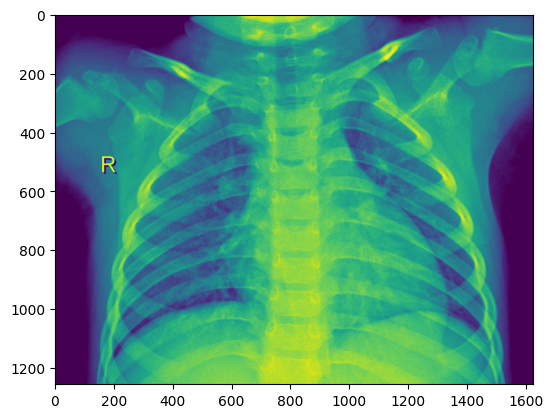

In [28]:
img = data_path + '/train/NORMAL/'+ files_list_normal_train[rand_img_no]
print(plt.imread(img).shape)
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

(1072, 1384)


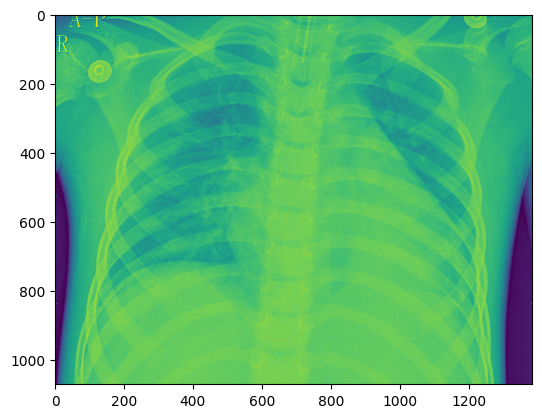

In [29]:
img = data_path + '/train/PNEUMONIA/'+ files_list_pneumonia_train[np.random.randint(0,len(files_list_pneumonia_train))]
print(plt.imread(img).shape)
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

(1965, 2381)


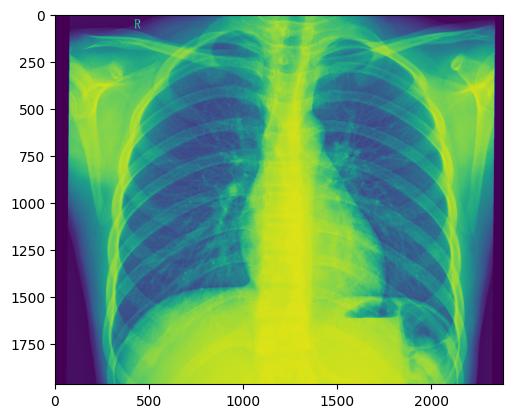

In [30]:
rand_img_no = np.random.randint(0,len(files_list_normal_test))
img = data_path + '/test/NORMAL/'+ files_list_normal_test[rand_img_no]
print(plt.imread(img).shape)
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

(870, 1110)


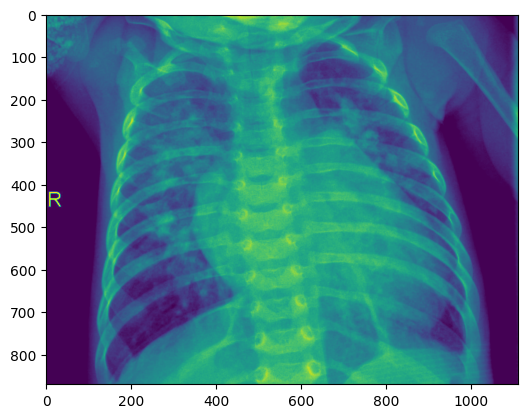

In [31]:
img = data_path + '/test/PNEUMONIA/'+ files_list_pneumonia_test[np.random.randint(0,len(files_list_pneumonia_test))]
print(plt.imread(img).shape)
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

# Transforming the images

- Now that we have seen the sample of the images let's transform the data now 
- We need to perform transformation on both train and test images 
- For Training data we need to perform the data augmentation also.
- Data Augmentation is done to create synthetic data.

In **Transformation** we are doing Resize,CenterCrop,ColorJitter,RandomHorizontalFlip,RandomRotation,ToTensor and Normalize.

- Resize:- Resize the input image to the given size.
- CenterCrop:- Crops the given image at the center.
- ColorJitter:- Randomly change the brightness, contrast, saturation and hue of an image.
- RandomHorizontalFlip:- Horizontally flip the given image randomly with a given probability.
- RandomRotation:- Rotate the image by angle.
- ToTensor:- Convert numpy.ndarray to tensor.
- Normalize:- Normalize a float tensor image with mean and standard deviation.

In [32]:
train_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
])

In [33]:
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
])

### Creating Data Loader

- For our usecase will be using the default data loader for Pytorch.
- We will be creating 2 data loaders one for the training data and other for the test data.
- batch size is a hyperparameter which we can tweak according to our need and system configuration.
- We can provide Image shuffling True for training data and False for test data.
- Pin memory is used to transfer the loaded dataset from CPU to GPU.

In [34]:
train_data = datasets.ImageFolder(os.path.join(data_path, 'train'), transform= train_transform)

In [35]:
train_data

Dataset ImageFolder
    Number of datapoints: 5215
    Root location: c:\Users\HP\Documents\projects\Chest-Xray-Classification\artifacts\09_10_2024_11_38_32\data_ingestion\data\train
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ColorJitter(brightness=[0.9, 1.1], contrast=[0.9, 1.1], saturation=[0.9, 1.1], hue=[-0.1, 0.1])
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [36]:
test_data = datasets.ImageFolder(os.path.join(data_path, 'test'), transform= test_transform)

In [37]:
test_data

Dataset ImageFolder
    Number of datapoints: 623
    Root location: c:\Users\HP\Documents\projects\Chest-Xray-Classification\artifacts\09_10_2024_11_38_32\data_ingestion\data\test
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [38]:
train_loader = DataLoader(train_data,
                          batch_size= 2, shuffle= True, pin_memory= True)

In [39]:
test_loader = DataLoader(test_data,
                         batch_size= 2, shuffle= False, pin_memory= True)

In [40]:
class_names = train_data.classes
print(class_names)
print(f'Number of train images: {len(train_data)}')
print(f'Number of test images: {len(test_data)}')

['NORMAL', 'PNEUMONIA']
Number of train images: 5215
Number of test images: 623


### Creating the model Architecture

- First Layer is the **input layer** consisting of 3 input channels and output channels with kernel_size of 3X3, padding=0 and bias=True. The activation function we are using is ReLU and performing batch normalization.
- Then we are performing max pooling to extract the important features out of the image.
- Similarly we are passing our model through 9 convolutional layers.
- Finally we are passing out passing our model through a output layer in which we are getting binary classification.

In [41]:
class Net(nn.Module):
    def __init__(self):
        """
        Creating custom CNN architecture for Image classification
        """
        super(Net, self).__init__()

        # Input Block:
        # A convolutional layer that takes a 3-channel input (e.g., RGB image) and outputs 8 feature maps.
        # Followed by ReLU activation and batch normalization.
        self.convolution_block1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=(3, 3), # 3x3 convolution, 3 input channels (RGB), 8 output channels, no padding
                      padding=0, bias=True),
            nn.ReLU(), # ReLU activation to introduce non-linearity
            nn.BatchNorm2d(8) # Batch normalization to normalize outputs of the convolution
        )
        self.pooling11 = nn.MaxPool2d(2, 2)

        # CONVOLUTION BLOCK 2
        # A second convolutional block that increases the depth of the feature maps from 8 to 20.
        self.convolution_block2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=20, kernel_size=(3, 3), # 3x3 convolution, 8 input channels, 20 output channels, no padding
                      padding=0, bias=True),
            nn.ReLU(), # ReLU activation
            nn.BatchNorm2d(20) # Batch normalization
        )
        self.pooling22 = nn.MaxPool2d(2, 2) # Another Max pooling layer to downsample by a factor of 2

        # CONVOLUTION BLOCK 3
        # A 1x1 convolution to reduce the number of channels from 20 to 10.
        self.convolution_block3 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=10, kernel_size=(1, 1), padding=0, bias=True), # 1x1 convolution, reduces channel depth
            nn.ReLU(),
            nn.BatchNorm2d(10),
        )
        self.pooling33 = nn.MaxPool2d(2, 2) # Max pooling layer to further reduce spatial dimensions

        # CONVOLUTION BLOCK 4
        self.convolution_block4 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=(3, 3), padding=0, bias=True), # 3x3 convolution, 10 input channels, 20 output channels
            nn.ReLU(),
            nn.BatchNorm2d(20)
        )

        # CONVOLUTION BLOCK 5
        # Another 1x1 convolution to change the depth to 32.
        self.convolution_block5 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=32, kernel_size=(1, 1), padding=0, bias=True), # 1x1 convolution, increases channel depth
            nn.ReLU(),
            nn.BatchNorm2d(32),
        )

        # CONVOLUTION BLOCK 6
#       # A 3x3 convolution to reduce the number of channels to 10.
        self.convolution_block6 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=10, kernel_size=(3, 3), padding=0, bias=True), # 3x3 convolution, reduces channel depth
            nn.ReLU(),
            nn.BatchNorm2d(10)
        )

        # CONVOLUTION BLOCK 7
        # A 1x1 convolution that maintains the number of channels.
        self.convolution_block7 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(1, 1), padding=0, bias=True), # 1x1 convolution, same number of input and output channels
            nn.ReLU(),
            nn.BatchNorm2d(10)
        )

        # CONVOLUTION BLOCK 8
        # A 3x3 convolution to increase the depth to 14 channels.
        self.convolution_block8 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=14, kernel_size=(3, 3), padding=0, bias=True), # 3x3 convolution, increases channel depth
            nn.ReLU(),
            nn.BatchNorm2d(14)
        )

        # CONVOLUTION BLOCK 8
        # A 3x3 convolution to increase the depth to 16 channels.
        self.convolution_block9 = nn.Sequential(
            nn.Conv2d(in_channels=14, out_channels=16, kernel_size=(3, 3), padding=0, bias=True), # 3x3 convolution, increases channel depth
            nn.ReLU(),
            nn.BatchNorm2d(16)
        )

        # OUTPUT BLOCK
       
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=4)
        )
        self.convolution_block_out = nn.Sequential(
              nn.Conv2d(in_channels=16, out_channels=2, kernel_size=(4, 4), padding=0, bias=True),
        )

    def forward(self, x):
        # Forward pass through the network layers
        x = self.convolution_block1(x) # Pass input through first convolution block
        x = self.pooling11(x) # Apply Pooling
        x = self.convolution_block2(x) # Second Convolution Block
        x = self.pooling22(x) # Apply Pooling
        x = self.convolution_block3(x) # Third Convolution Block
        x = self.pooling33(x) # Apply Pooling
        x = self.convolution_block4(x) # Fourth Convolution Block
        x = self.convolution_block5(x) # Fifth Convolution Block
        x = self.convolution_block6(x) # Sixth Convolution Block
        x = self.convolution_block7(x) # Seventh Convolution Block
        x = self.convolution_block8(x) # Eighth Convolution Block
        x = self.convolution_block9(x) # Ninth Convolution Block
        x = self.gap(x) # Global average pooling to reduce to 1x1 feature map
        x = self.convolution_block_out(x) # Output convolution layer to get final class scores
        x = x.view(-1, 2) # Flatten the output for the log softmax function
        return F.log_softmax(x, dim=-1)

In [42]:
# To check weather cuda is available in the system or not 
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Available processor {}".format(device))
model = Net().to(device)
# To check the model summary
summary(model, input_size=(3, 224, 224))

Available processor cpu
Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       224
|    └─ReLU: 2-2                         --
|    └─BatchNorm2d: 2-3                  16
├─MaxPool2d: 1-2                         --
├─Sequential: 1-3                        --
|    └─Conv2d: 2-4                       1,460
|    └─ReLU: 2-5                         --
|    └─BatchNorm2d: 2-6                  40
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
|    └─Conv2d: 2-7                       210
|    └─ReLU: 2-8                         --
|    └─BatchNorm2d: 2-9                  20
├─MaxPool2d: 1-6                         --
├─Sequential: 1-7                        --
|    └─Conv2d: 2-10                      1,820
|    └─ReLU: 2-11                        --
|    └─BatchNorm2d: 2-12                 40
├─Sequential: 1-8                        --
|    └─Conv2d: 2-13                    

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       224
|    └─ReLU: 2-2                         --
|    └─BatchNorm2d: 2-3                  16
├─MaxPool2d: 1-2                         --
├─Sequential: 1-3                        --
|    └─Conv2d: 2-4                       1,460
|    └─ReLU: 2-5                         --
|    └─BatchNorm2d: 2-6                  40
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
|    └─Conv2d: 2-7                       210
|    └─ReLU: 2-8                         --
|    └─BatchNorm2d: 2-9                  20
├─MaxPool2d: 1-6                         --
├─Sequential: 1-7                        --
|    └─Conv2d: 2-10                      1,820
|    └─ReLU: 2-11                        --
|    └─BatchNorm2d: 2-12                 40
├─Sequential: 1-8                        --
|    └─Conv2d: 2-13                      672
|    └─ReLU: 2-14 

In [43]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

In [45]:
def train(model, device, train_loader, optimizer, epoch):
    """
    Description: Function to train the model
    
    Inputs:
    - model: The neural network model to be trained
    - device: The device (CPU or GPU) on which to perform the training
    - train_loader: DataLoader for the training data
    - optimizer: Optimizer to update model weights
    - epoch: Current epoch number for training
    
    Outputs:
    - Logs the loss, batch id, and accuracy for each batch
    """
    # Set the model to training mode
    model.train()
    
    # Initialize the progress bar for the training process
    pbar = tqdm(train_loader)
    
    # Initialize counters for correct predictions and processed samples
    correct = 0
    processed = 0
    
    # Iterate over batches in the training data
    for batch_idx, (data, target) in enumerate(pbar):
        # Move data and target to the specified device (CPU or GPU)
        data, target = data.to(device), target.to(device)
        
        # Zero out the gradients for the optimizer
        optimizer.zero_grad()
        # In PyTorch, gradients accumulate with backpropagation by default. This can be useful in RNNs,
        # but for most CNN applications or general purposes, we zero the gradients before each update.

        # Perform a forward pass to compute the model's predictions
        y_pred = model(data)
        
        # Compute the loss between the predicted and actual target labels using Negative Log Likelihood Loss
        loss = F.nll_loss(y_pred, target)
        train_losses.append(loss)
        
        # Perform a backward pass to compute gradients
        loss.backward()
        
        # Update the model parameters using the optimizer
        optimizer.step()
        
        # Compute the index of the maximum predicted log-probability
        pred = y_pred.argmax(dim=1, keepdim=True)
        
        # Compute the number of correct predictions
        correct += pred.eq(target.view_as(pred)).sum().item()
        
        # Keep track of the total number of processed samples
        processed += len(data)
        
        # Update the progress bar with the current loss, batch id, and accuracy
        pbar.set_description(desc=f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100 * correct / processed:0.2f}')
        
        # Append the accuracy to the list for tracking
        train_acc.append(100 * correct / processed)


In [48]:
def test(model, device, test_loader):
    """
    Description: Function to test the model on a validation or test dataset.
    
    Inputs:
    - model: The trained neural network model to be tested
    - device: The device (CPU or GPU) on which to perform the testing
    - test_loader: DataLoader for the test data
    
    Outputs:
    - Prints the average loss and accuracy of the model on the test dataset
    """
    
    # Set the model to evaluation mode
    model.eval()
    
    # Initialize test loss and correct prediction counters
    test_loss = 0
    correct = 0
    
    # Disable gradient computation for testing, which reduces memory usage and speeds up computations
    with torch.no_grad():
        # Iterate over all batches in the test dataset
        for data, target in test_loader:
            # Move data and target labels to the specified device (CPU or GPU)
            data, target = data.to(device), target.to(device)
            
            # Perform a forward pass through the model to obtain predictions
            output = model(data)
            
            # Calculate the loss and sum it for all batches
            # Use 'reduction='sum'' to get the total loss across all elements in the batch
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            
            # Get the predicted class label with the highest probability
            pred = output.argmax(dim=1, keepdim=True)
            
            # Count the number of correct predictions
            correct += pred.eq(target.view_as(pred)).sum().item()
    
    # Calculate the average test loss by dividing the total loss by the number of samples in the test dataset
    test_loss /= len(test_loader.dataset)
    
    # Append the computed loss to the list of test losses for tracking
    test_losses.append(test_loss)
    
    # Print the average loss and accuracy for the test dataset
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    # Append the computed accuracy to the list of test accuracies for tracking
    test_acc.append(100. * correct / len(test_loader.dataset))

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
    test_acc.append(100. * correct / len(test_loader.dataset))

In [49]:
# Defining the params for training 
model =  Net().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.8)
scheduler = StepLR(optimizer, step_size=6, gamma=0.5)
EPOCHS = 1

In [50]:
#Training the model
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    scheduler.step()
    print('current Learning Rate: ', optimizer.state_dict()["param_groups"][0]["lr"])
    test(model, device, test_loader) 

EPOCH: 0


Loss=0.024867026135325432 Batch_id=2607 Accuracy=91.14: 100%|██████████| 2608/2608 [03:55<00:00, 11.08it/s]  


current Learning Rate:  0.01

Test set: Average loss: 0.7432, Accuracy: 496/623 (79.61%)


Test set: Average loss: 0.7444, Accuracy: 992/623 (159.23%)



Text(0.5, 1.0, 'Test Accuracy')

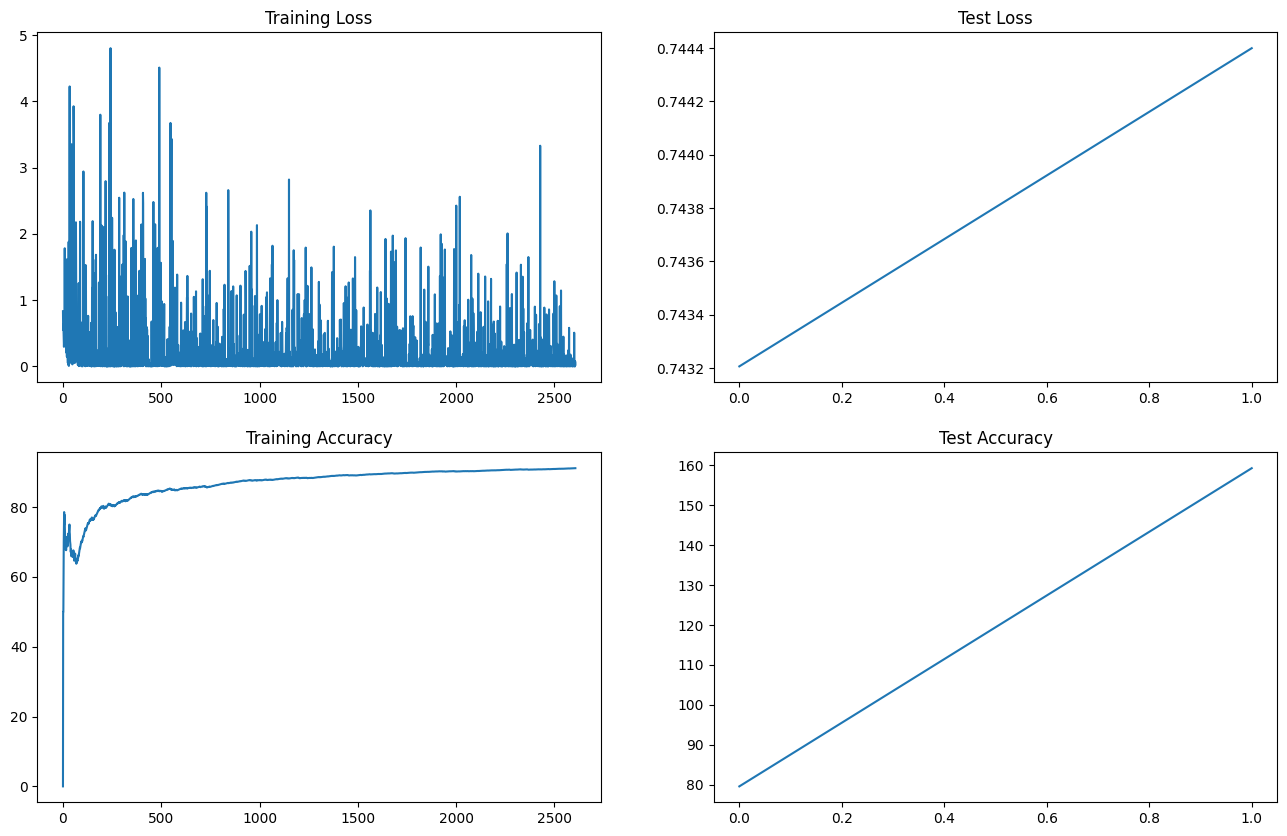

In [51]:
train_losses1 = [float(i.cpu().detach().numpy()) for i in train_losses]
train_acc1 = [i for i in train_acc]
test_losses1 = [i for i in test_losses]
test_acc1 = [i for i in test_acc]
fig, axs = plt.subplots(2,2,figsize=(16,10))
axs[0, 0].plot(train_losses1)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc1)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses1)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc1)
axs[1, 1].set_title("Test Accuracy")